# Analyzing Audio 🔊 

NeuroQuest AI Spectrum Service

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [2]:
audio_files = glob('./audio/*.ogg')

In [3]:
audio_files

['./audio/OBAMA-SPEECH01.ogg', './audio/OBAMA-SPEECH02.ogg']

In [4]:
ipd.Audio(audio_files[0])

In [18]:
y, sr = librosa.load(audio_files[0])

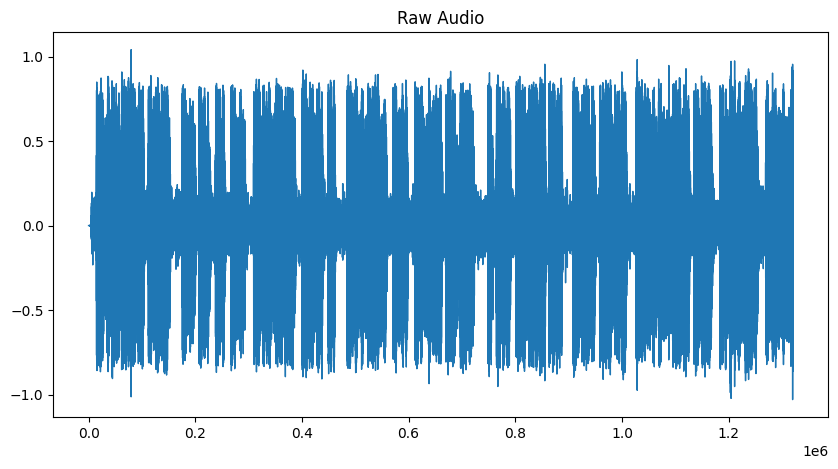

In [19]:
pd.Series(y).plot(figsize=(10, 5), lw=1, title="Raw Audio", color=color_pal[0])
plt.show()

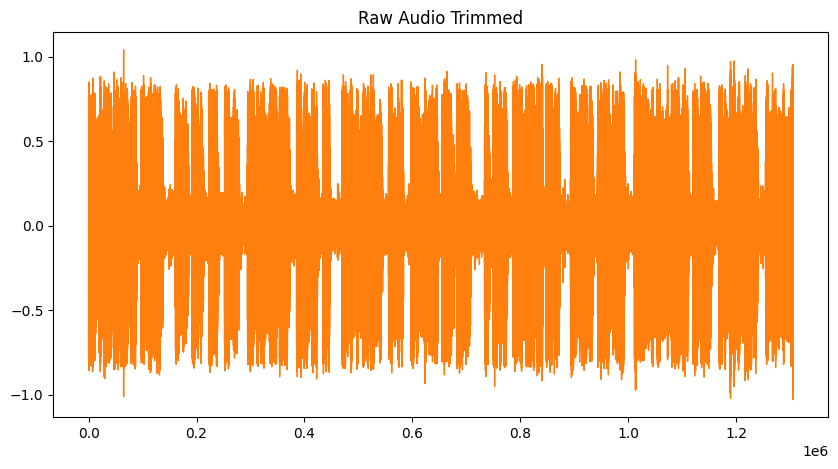

In [23]:
y_trimmed, _ = librosa.effects.trim(y, top_db=5)
pd.Series(y_trimmed).plot(
    figsize=(10, 5), lw=1, title="Raw Audio Trimmed", color=color_pal[1]
)
plt.show()

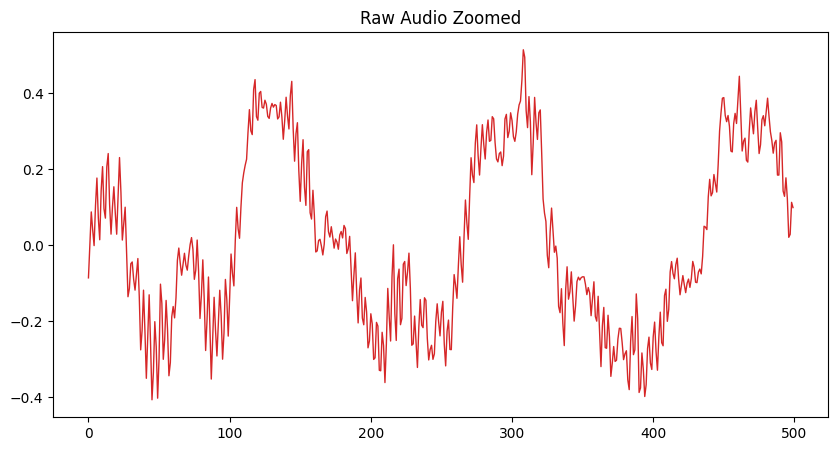

In [24]:
pd.Series(y[30000:30500]).plot(
    figsize=(10, 5), lw=1, title="Raw Audio Zoomed", color=color_pal[3]
)
plt.show()

In [9]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 2580)

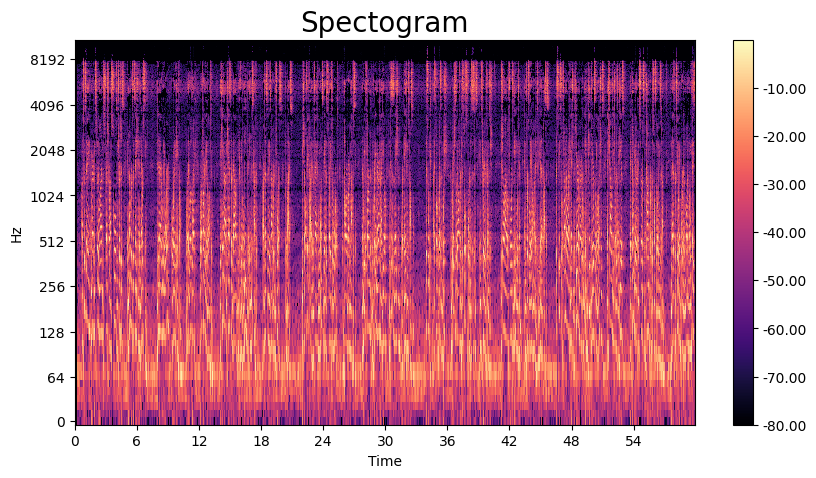

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db, x_axis="time", y_axis="log", ax=ax)
ax.set_title("Spectogram", fontsize=20)
fig.colorbar(img, ax=ax, format=f"%0.2f")
plt.show()

In [11]:
S = librosa.feature.melspectrogram(
    y=y,
    sr=sr,
    n_mels=128 * 2,
)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

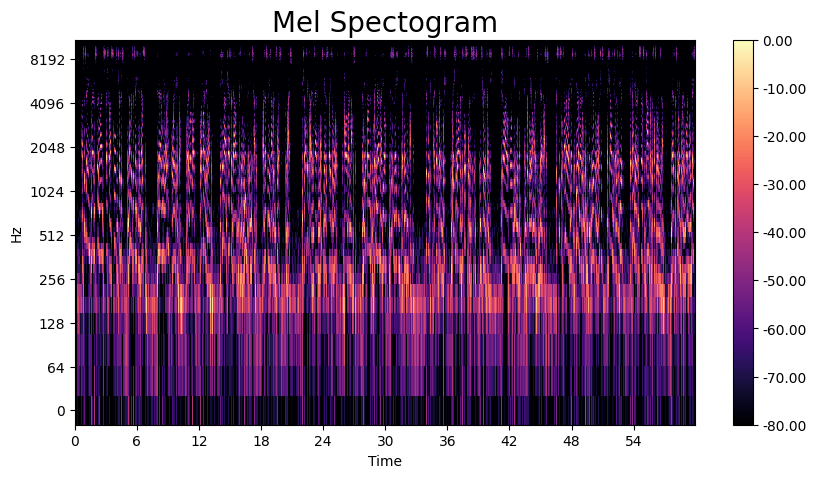

In [26]:
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db_mel, x_axis="time", y_axis="log", ax=ax)
ax.set_title("Mel Spectogram", fontsize=20)
fig.colorbar(img, ax=ax, format=f"%0.2f")
plt.show()